## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. With the latest technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, we will perform an exploratory analysis on data provided by Citi Bike,a bike-share system provider. 
Citi Bike is the nation's largest bike share program, with 14,500 bikes and 950 stations across Manhattan, Brooklyn, Queens and Jersey City. It was designed for quick trips with convenience in mind, and it’s a fun and affordable way to get around town.

## Posing Questions 

Before looking at the bike sharing data, rather any data, we should start by asking questions we might want to 
understand about the bike share data. Consider, for example, if we were working for Motivate. 
What kinds of information would we want to know about in order to make smarter business decisions? 
Also, if we are a user of the bike-share service, what factors might influence how we would want to use the service?

Below are some of the questions we could ask to make some business decisions.

Where do Citi Bikers ride? <br>
When do they ride? <br>
How far do they go? <br>
Which stations are most popular? <br>
What days of the week are most rides taken on? <br>

## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2020 August from Manhattan, Brooklyn, Queens and Jersey City. The data includes the following columns 

Trip Duration (seconds) <br>
Start Time and Date <br>
Stop Time and Date <br>
Start Station Name <br>
End Station Name <br>
Station ID <br>
Station Lat/Long <br>
Bike ID <br>
User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member) <br>
Gender (Zero=unknown; 1=male; 2=female) <br>
Year of Birth <br>

This data has been processed to remove trips that are taken by staff as they service and inspect the system, trips that are taken to/from any of our “test” stations (which we were using more in June and July 2013), and any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it's secure).

In [2]:
#importing the required libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

%matplotlib inline

In [3]:
# Reading the data in to a pandas data frame

bikedata_july_2020 = pd.read_csv('nycbikedata.csv') 
bikedata_july_2019 = pd.read_csv('201907-citibike.csv') 
bikedata = pd.concat([bikedata_july_2020,bikedata_july_2019])
bikedata.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2333,2020-07-01 00:23:19.8220,2020-07-01 01:02:13.2980,3694,Jackson Square,40.711130,-74.078900,3276,Marin Light Rail,40.714584,-74.042817,42579,Customer,1969,0
1,1203,2020-07-01 00:27:45.2420,2020-07-01 00:47:49.1960,3791,Hoboken Ave at Monmouth St,40.735208,-74.046964,3202,Newport PATH,40.727224,-74.033759,42564,Subscriber,1965,1
2,786,2020-07-01 00:34:17.8680,2020-07-01 00:47:24.6310,3792,Columbus Dr at Exchange Pl,40.716870,-74.032810,3225,Baldwin at Montgomery,40.723659,-74.064194,42219,Subscriber,1994,1
3,1488,2020-07-01 00:51:07.5310,2020-07-01 01:15:56.0200,3677,Glenwood Ave,40.727551,-74.071061,3194,McGinley Square,40.725340,-74.067622,44424,Subscriber,1995,2
4,2682,2020-07-01 00:51:16.3880,2020-07-01 01:35:58.4590,3191,Union St,40.718211,-74.083639,3193,Lincoln Park,40.724605,-74.078406,42186,Subscriber,1993,1


In [4]:
#looking at the information of the data frame

bikedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82426 entries, 0 to 43745
Data columns (total 15 columns):
tripduration               82426 non-null int64
starttime                  82426 non-null object
stoptime                   82426 non-null object
start station id           82426 non-null int64
start station name         82426 non-null object
start station latitude     82426 non-null float64
start station longitude    82426 non-null float64
end station id             82426 non-null int64
end station name           82426 non-null object
end station latitude       82426 non-null float64
end station longitude      82426 non-null float64
bikeid                     82426 non-null int64
usertype                   82426 non-null object
birth year                 82426 non-null int64
gender                     82426 non-null int64
dtypes: float64(4), int64(6), object(5)
memory usage: 10.1+ MB


In [5]:
#looking at the stats

bikedata.describe()


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,8.242600e+04,82426.000000,82426.000000,82426.000000,82426.000000,82426.000000,82426.000000,82426.000000,82426.000000,82426.000000
mean,1.295278e+03,3298.960377,40.722358,-74.046678,3296.538993,40.721102,-74.044472,34635.478890,1981.386638,1.102225
std,1.393145e+04,178.515560,0.007280,0.011650,186.988409,0.200721,0.364926,7582.152805,10.706544,0.605391
min,6.100000e+01,3184.000000,40.709651,-74.083639,173.000000,0.000000,-74.083639,14607.000000,1888.000000,0.000000
25%,2.850000e+02,3195.000000,40.716870,-74.050990,3193.000000,40.716870,-74.050656,29247.000000,1971.000000,1.000000
50%,5.090000e+02,3209.000000,40.721525,-74.043991,3207.000000,40.721124,-74.043845,29624.000000,1984.000000,1.000000
75%,1.112000e+03,3276.000000,40.727224,-74.038051,3276.000000,40.727224,-74.038051,42423.000000,1990.000000,1.000000
max,2.423337e+06,3792.000000,40.748716,-74.032108,3992.000000,40.842842,0.000000,45647.000000,2004.000000,2.000000


## Preprocess

There might be some missing data in the data set,like strange stations or null values .

In [6]:
(rows,columns) = bikedata.shape

print('There are {} rows and {} columns in the data frame'.format(rows,columns))

There are 82426 rows and 15 columns in the data frame


In [7]:
#Looking at the nulls value counts in the dataframe

bikedata.isnull().sum()

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64

The data looks to be clean so far with out any null values . Lets look to find any strange data 

In [8]:
#any trips that were below 60 seconds in length (potentially false starts or users trying to re-dock a bike to ensure it's secure).
#Lets delete all the trips below 60 seconds

bikedata.drop(bikedata[bikedata['tripduration'] < 60].index, inplace = True)

In [9]:
bikedata['tripduration'].max()/60

40388.95

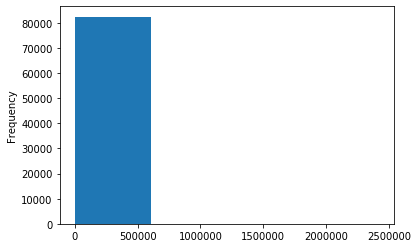

In [10]:
bikedata['tripduration'].plot.hist(bins = 4)

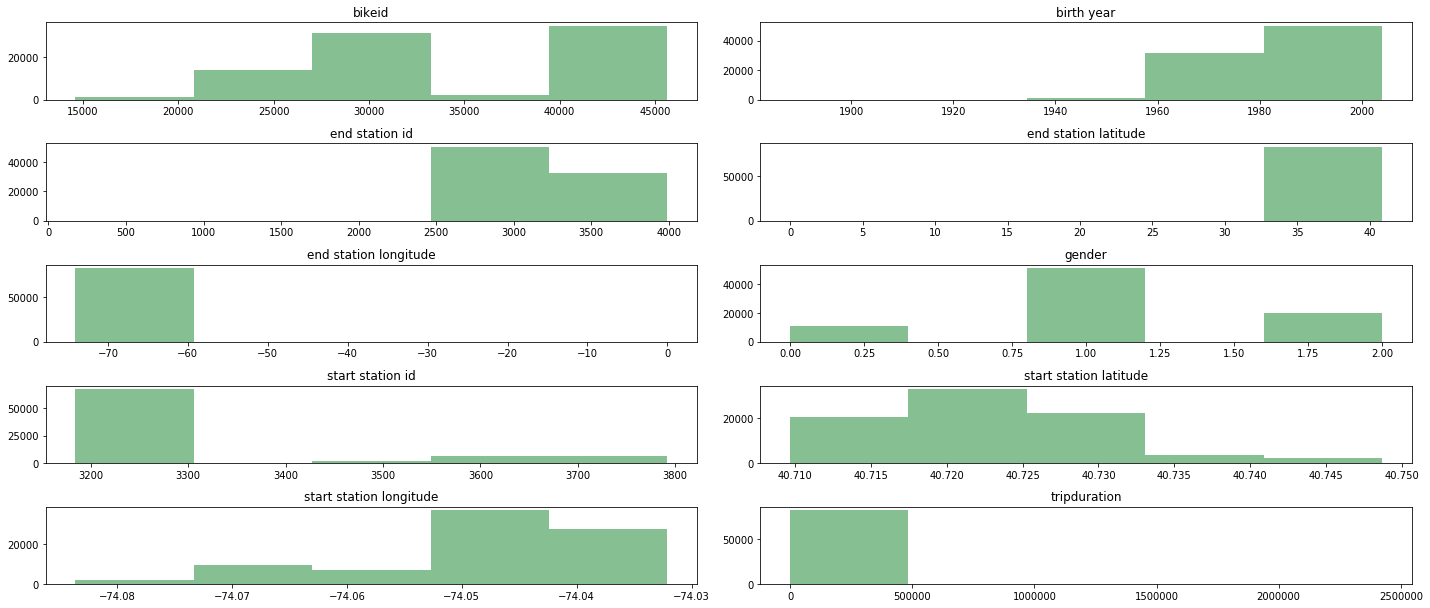

In [11]:
#Plotting the histogram to look at irregularities

bikedata.hist(bins=5, grid=False, figsize=(20,10), color='#86bf91',layout = (6,2))
plt.tight_layout()

In [12]:
#creating a collection of unique start and end stations data frame

start_station_details = bikedata[['start station id', 'start station name', 'start station latitude', 'start station longitude']] \
            .drop_duplicates().rename(columns = {'start station id':'station id', \
                                                 'start station name':'station name', \
                                                 'start station latitude':'station latitude', 
                                                 'start station longitude': 'station longitude'})
end_station_details = bikedata[['end station id', 'end station name', 'end station latitude', 'end station longitude']] \
        .drop_duplicates().rename(columns = {'end station id':'station id', \
                                             'end station name':'station name', \
                                             'end station latitude':'station latitude', \
                                             'end station longitude': 'station longitude'})
bikedata_loc = pd.concat([start_station_details, end_station_details]).drop_duplicates()

Lets add some details about what generation used subscriber belongs to

In [13]:


def birthyear_to_generation(row):
    
    """The following function categorize the given birth year in to a right generation bucket
    Input : Row
    Output: Category
    """
    
    if row['birth year'] >= 1946 and  row['birth year'] <= 1964:
        return 'Baby Boomers'
    elif row['birth year'] >= 1965 and  row['birth year'] < 1980:
        return 'Gen X' 
    elif row['birth year'] >= 1980 and  row['birth year'] <= 1994:
         return 'Gen Y'
    elif row['birth year'] >= 1995 and  row['birth year'] < 2015:
         return 'Gen Z'
    else:
        return 'other'
    
bikedata['Age Category'] = bikedata.apply(birthyear_to_generation , axis = 1)

In [14]:
bikedata['Age Category'].value_counts()

Gen Y           46018
Gen X           25414
Gen Z            5925
Baby Boomers     5017
other              52
Name: Age Category, dtype: int64

In [15]:
#Converting the data types of the start and stop time to a date time format 

bikedata['starttime'] = pd.to_datetime(bikedata['starttime'], format='%Y-%m-%d %H:%M:%S')
bikedata['stoptime'] =pd.to_datetime(bikedata['stoptime'], format='%Y-%m-%d %H:%M:%S')
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82426 entries, 0 to 43745
Data columns (total 16 columns):
tripduration               82426 non-null int64
starttime                  82426 non-null datetime64[ns]
stoptime                   82426 non-null datetime64[ns]
start station id           82426 non-null int64
start station name         82426 non-null object
start station latitude     82426 non-null float64
start station longitude    82426 non-null float64
end station id             82426 non-null int64
end station name           82426 non-null object
end station latitude       82426 non-null float64
end station longitude      82426 non-null float64
bikeid                     82426 non-null int64
usertype                   82426 non-null object
birth year                 82426 non-null int64
gender                     82426 non-null int64
Age Category               82426 non-null object
dtypes: datetime64[ns](2), float64(4), int64(6), object(4)
memory usage: 10.7+ MB


In [16]:
#Adding the year column in to the data frame for future analysis

bikedata['Year'] = bikedata['starttime'].dt.year

In [17]:
def gen_time_segment(dt):
    """
    The fucntion takes a date time input and outputs it in to minutes buckets.
    Input :Datetime
    Output: Datetime with just minute
    """
    if dt.minute < 30:
        minute = "%02d" % 0
    else:
        minute = "%02d" % 30
    return "{}-{}-{} {}:{}".format(dt.year, dt.month, dt.day, dt.hour, minute)

bikedata['start_segment'] = [gen_time_segment(dt) for dt in bikedata['starttime']]
bikedata['stop_segment'] = [gen_time_segment(dt) for dt in bikedata['stoptime']]

bikedata[['start station id', 'starttime', 'start_segment', 'end station id', 'stoptime', 'stop_segment']].head()

,start station id,starttime,start_segment,end station id,stoptime,stop_segment
0,3694,2020-07-01 00:23:19.822,2020-7-1 0:00,3276,2020-07-01 01:02:13.298,2020-7-1 1:00
1,3791,2020-07-01 00:27:45.242,2020-7-1 0:00,3202,2020-07-01 00:47:49.196,2020-7-1 0:30
2,3792,2020-07-01 00:34:17.868,2020-7-1 0:30,3225,2020-07-01 00:47:24.631,2020-7-1 0:30
3,3677,2020-07-01 00:51:07.531,2020-7-1 0:30,3194,2020-07-01 01:15:56.020,2020-7-1 1:00
4,3191,2020-07-01 00:51:16.388,2020-7-1 0:30,3193,2020-07-01 01:35:58.459,2020-7-1 1:30


In [18]:
inflow = bikedata[['end station id', 'stop_segment']] \
            .groupby(['end station id', 'stop_segment']) \
            .size().reset_index(name='counts') \
            .rename(columns={'end station id':'station id','stop_segment':'time', 'counts':'in_flow_count'})

In [19]:
outflow = bikedata[['start station id', 'start_segment']] \
            .groupby(['start station id', 'start_segment']) \
            .size().reset_index(name='counts') \
            .rename(columns={'start station id':'station id','start_segment':'time', 'counts':'out_flow_count'})

In [20]:
#bikedata.head()
inflow.head()

,station id,time,in_flow_count
0,173,2020-7-15 8:30,1
1,173,2020-7-16 8:00,1
2,173,2020-7-21 8:00,1
3,173,2020-7-23 8:00,1
4,173,2020-7-7 8:00,1


In [21]:
#creating a list of stations Ids

station_id_list = list(bikedata_loc['station id'])

In [22]:
# Create combinations of time series and station ids
time_seg_list = list(pd.date_range("2020-07-01 00:00:00", "2020-07-31 23:30:00", freq="30min"))
template = pd.DataFrame(list(itertools.product(station_id_list, time_seg_list)), \
                        columns=["station id", "time"])

# Merge in/out flow information & Add zeros to missing data according to every time segment
dat = pd.merge(inflow, outflow, on=['station id', 'time'], how='outer')
dat['time'] = pd.to_datetime(dat['time'], format='%Y-%m-%d %H:%M')
dat = dat.merge(template, on=["station id", "time"], how="right").fillna(0)
dat.head()

,station id,time,in_flow_count,out_flow_count
0,173,2020-07-15 08:30:00,1.0,0.0
1,173,2020-07-16 08:00:00,1.0,0.0
2,173,2020-07-21 08:00:00,1.0,0.0
3,173,2020-07-23 08:00:00,1.0,0.0
4,173,2020-07-07 08:00:00,1.0,0.0


In [23]:
dat.shape

(120528, 4)

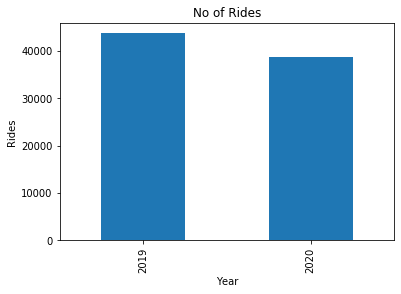

In [43]:
#Total number of trips 

bikedata.groupby(['Year']).size().plot.bar()
plt.title('No of Rides')
plt.ylabel('Rides')
plt.show()

## Lets answers some questions

1 - What generation is popular in renting the bikes ? Is it younger or older generation that is using the bike rental service ? Was there any change due to COVID ? 

In [27]:
bikedata['Age Category'].value_counts()

Gen Y           46018
Gen X           25414
Gen Z            5925
Baby Boomers     5017
other              52
Name: Age Category, dtype: int64

Text(11.625, 0.5, 'Counts')

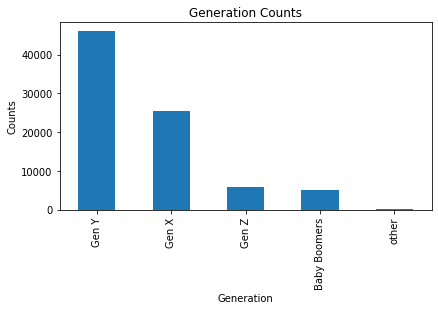

In [28]:
bikedata['Age Category'].value_counts().plot.bar()
plt.tight_layout()
plt.title('Generation Counts')
plt.xlabel('Generation')
plt.ylabel('Counts')

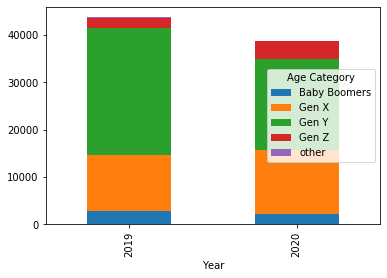

In [67]:
bikedata.groupby(['Year','Age Category']).size().unstack().plot.bar(stacked=True)

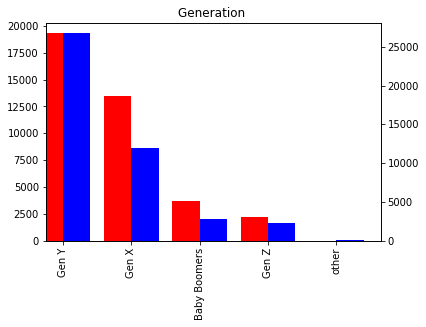

In [71]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

#bikedata.groupby(['Age Category','Year']).size().plot.bar(x = 'Year',y = 'Age Category',stacked=True)
bikedata[bikedata['Year'] == 2020 ]['Age Category'].value_counts().plot(kind='bar', color='red', ax=ax, width=width, position=1)
bikedata[bikedata['Year'] == 2019 ]['Age Category'].value_counts().plot(kind='bar', color='blue', ax=ax2, width=width, position=0)
plt.title('Generation ')
#ax.legend(['2020'])
#ax2.legend(['2019'])
plt.show()

2. What percentage of the customers are subscribes ? How long do subscribes typically rent the bike for ?

Text(11.625, 0.5, 'Counts')

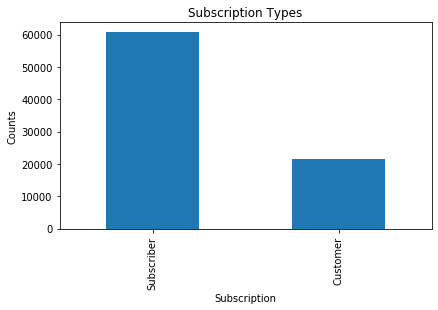

In [30]:
bikedata['usertype'].value_counts().plot.bar()
plt.tight_layout()
plt.title('Subscription Types')
plt.xlabel('Subscription')
plt.ylabel('Counts')

In [31]:
user_type_count = bikedata['usertype'].value_counts()
total_count = bikedata['usertype'].count()
percentage = (user_type_count['Subscriber']/total_count) * 100
print('The percentage of subscribers is {:.2f} %'.format(percentage))

The percentage of subscribers is 73.71 %


In [32]:
mean_time_of_subscribers = bikedata[bikedata['usertype'] == 'Subscriber']['tripduration'].mean()
mean_time_of_customer = bikedata[bikedata['usertype'] == 'Customer']['tripduration'].mean()

print('The average bike rental time(mins) of subscriber is {:.2f}'.format(mean_time_of_subscribers/60))
print('The average bike rental time(mins) of customer is {:.2f}'.format(mean_time_of_customer/60))

The average bike rental time(mins) of subscriber is 11.92
The average bike rental time(mins) of customer is 48.70


3 - Did COVID had any effect on the average time the people rented the bike for ?

In [33]:
mean_time_of_subscribers_2019 = bikedata[(bikedata['usertype'] == 'Subscriber') & (bikedata['Year'] == 2019)]['tripduration'].mean()
mean_time_of_customer_2019 = bikedata[(bikedata['usertype'] == 'Customer') & (bikedata['Year'] == 2019)]['tripduration'].mean()


print('The average bike rental time(mins) of subscriber in 2019 is {:.2f}'.format(mean_time_of_subscribers_2019/60))
print('The average bike rental time(mins) of customer in 2019 is {:.2f}'.format(mean_time_of_customer_2019/60))

mean_time_of_subscribers_2020 = bikedata[(bikedata['usertype'] == 'Subscriber') & (bikedata['Year'] == 2020)]['tripduration'].mean()
mean_time_of_customer_2020 = bikedata[(bikedata['usertype'] == 'Customer') & (bikedata['Year'] == 2020)]['tripduration'].mean()

print('The average bike rental time(mins) of subscriber in 2020 is {:.2f}'.format(mean_time_of_subscribers_2020/60))
print('The average bike rental time(mins) of customer in 2020 is {:.2f}'.format(mean_time_of_customer_2020/60))

The average bike rental time(mins) of subscriber in 2019 is 9.04
The average bike rental time(mins) of customer in 2019 is 40.51
The average bike rental time(mins) of subscriber in 2020 is 16.56
The average bike rental time(mins) of customer in 2020 is 52.02


In [34]:
# Split the dataframe into weekdays information & weekends information
df_weekdays = bikedata[bikedata['starttime'].dt.dayofweek < 5]
df_weekends = bikedata[bikedata['starttime'].dt.dayofweek >= 5]

# Count and sort station pair frequencies
stn_pair_weekdays = df_weekdays[['start station id', 'end station id']] \
                    .groupby(['start station id', 'end station id']) \
                    .size().reset_index(name='counts') \
                    .set_index(['start station id', 'end station id']) \
                    .sort_values(by='counts', ascending=False)
stn_pair_weekends = df_weekends[['start station id', 'end station id']] \
                    .groupby(['start station id', 'end station id']) \
                    .size().reset_index(name='counts') \
                    .set_index(['start station id', 'end station id']) \
                    .sort_values(by='counts', ascending=False)
            
# Find the top 3 station pairs for weekday & weekend
top_weekday_pair = list(stn_pair_weekdays.head(3).index)
top_weekend_pair = list(stn_pair_weekends.head(3).index)

# Print out the result
print("The top 3 frequent stations pairs in weekdays are: {}, {}, and {}.".format(*top_weekday_pair))
print("The top 3 frequent stations pairs in weekends are: {}, {}, and {}.".format(*top_weekend_pair))

The top 3 frequent stations pairs in weekdays are: (3203, 3186), (3192, 3192), and (3186, 3203).
The top 3 frequent stations pairs in weekends are: (3192, 3192), (3199, 3199), and (3276, 3276).


In [35]:
# Sort the average in/out flow count of each station
average_inflow = dat[['station id', 'in_flow_count']] \
                .groupby(['station id']) \
                .mean() \
                .sort_values(by='in_flow_count', ascending=False)
average_outflow = dat[['station id', 'out_flow_count']] \
                .groupby(['station id']) \
                .mean() \
                .sort_values(by='out_flow_count', ascending=False)
            
# List the top 3 stations
top_inflow = list(average_inflow.head(3).index)
top_outflow = list(average_outflow.head(3).index)

# Print out the result
print("The top 3 stations with highest outflow are: {}, {}, and {}".format(*top_outflow))
print("The top 3 stations with highest inflow are: {}, {}, and {}".format(*top_inflow))

The top 3 stations with highest outflow are: 3199, 3192, and 3186
The top 3 stations with highest inflow are: 3199, 3186, and 3192


In [36]:
# Sum up in/out flow at each time station
dat['flow_count'] = dat['in_flow_count'] + dat['out_flow_count']

# Calculate and sort the average flow count for each station
average_flow = dat[['station id', 'flow_count']] \
                .groupby(['station id']) \
                .mean() \
                .sort_values(by='flow_count', ascending=False)
            
# Find the top 1 station
top_flow = list(average_inflow.head(1).index)

# Print out the result
print("The most popular station is: {}".format(*top_outflow))

The most popular station is: 3199


In [37]:
bikedata[bikedata['start station id'] == 3199]['start station name'].unique()

array(['Newport Pkwy'], dtype=object)